In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import cantera as ct
import matplotlib.pyplot as plt
import json

# Importing packages
import feedstock as fs
import pp
import gasifier as g
import fuel as fu
import energy as en
import outputs as op

For species Fe(c), discontinuity in cp/R detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  0.0
	Value computed using high-temperature polynomial: 4.2881898

For species Fe(c), discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  0.0
	Value computed using high-temperature polynomial: 3.425820683333331

For species Fe(c), discontinuity in s/R detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  0.0
	Value computed using high-temperature polynomial: 8.486560101557188

For species Cr(cr), discontinuity in cp/R detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  749.1520512400002
	Value computed using high-temperature polynomial: 0.0

For species Cr(cr), discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  113.24055562733336
	Value computed using high-temperature polynomial: 0.0

For species Cr(cr), discontinuity in s/R detec

In [2]:
# LI 2001
fuelID = 'Highvale'
moist = 0
T = np.arange(600, 1600+1, 1) # K
P = 1*10**5 # Pa
ER1 = 0.3
ER2 = 0.4

species = ['N2', 'H2', 'CO', 'CO2', 'H2O', 'CH4']

y1 = np.zeros((len(T), len(species)))

for i, t in enumerate(T):
    results = g.gasifier(fuelID, moist=moist, T=t, P=P, air=ER1, species=species)
    report = results[0]
    for j, sp in enumerate(species):
        y1[i,j] = report[sp]

y2 = np.zeros((len(T), len(species)))

for i, t in enumerate(T):
    results = g.gasifier(fuelID, moist=moist, T=t, P=P, air=ER2, species=species)
    report = results[0]
    for j, sp in enumerate(species):
        y2[i,j] = report[sp]

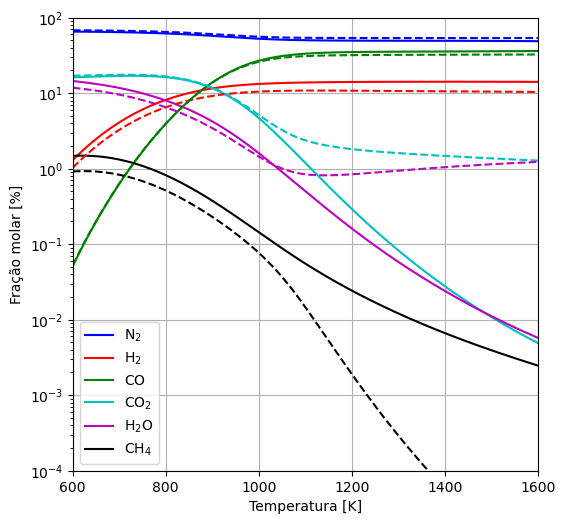

In [3]:
fig1 = plt.figure(figsize=(6,6), dpi = 100)
plt.semilogy(T, y1[:,0]*100, '-', color='b', label='$\mathregular{N_2}$')
plt.semilogy(T, y1[:,1]*100, '-', color='r', label='$\mathregular{H_2}$')
plt.semilogy(T, y1[:,2]*100, '-', color='g', label='$\mathregular{CO}$')
plt.semilogy(T, y1[:,3]*100, '-', color='c', label='$\mathregular{CO_2}$')
plt.semilogy(T, y1[:,4]*100, '-', color='m', label='$\mathregular{H_2O}$')
plt.semilogy(T, y1[:,5]*100, '-', color='k', label='$\mathregular{CH_4}$')
plt.semilogy(T, y2[:,0]*100, '--', color='b')
plt.semilogy(T, y2[:,1]*100, '--', color='r')
plt.semilogy(T, y2[:,2]*100, '--', color='g')
plt.semilogy(T, y2[:,3]*100, '--', color='c')
plt.semilogy(T, y2[:,4]*100, '--', color='m')
plt.semilogy(T, y2[:,5]*100, '--', color='k')
plt.grid()
plt.legend()
plt.xlim(T[0], T[-1])
plt.ylim(0.0001, 100)
plt.xlabel('Temperatura [K]')
plt.ylabel('Fração molar [%]')
#plt.title('Composição de equilíbrio vs. Temperatura')
plt.savefig('results/Li_Temp.png')
plt.show()